In [26]:
from transformers import GPT2LMHeadModel, pipeline, set_seed  #using the GPT transformer from huggingface which 
#implements it using torch instead of tf which openai used
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = GPT2LMHeadModel.from_pretrained('gpt2')  #uses the 124M parameter model
params = model.state_dict()  #load the model parameters

for k,v in params.items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [17]:
params["transformer.wpe.weight"].shape

torch.Size([1024, 768])

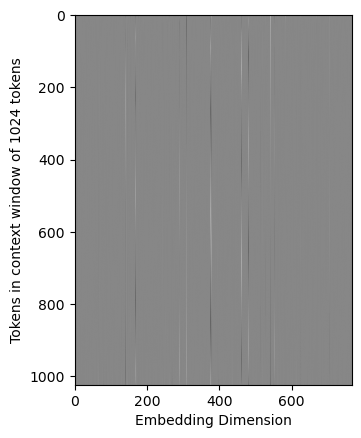

In [16]:
plt.imshow(params["transformer.wpe.weight"], cmap='grey', interpolation='nearest')
#wpe means weights of positional encoding, which is what it actually is
plt.xlabel('Embedding Dimension')
plt.ylabel('Tokens in context window of 1024 tokens');

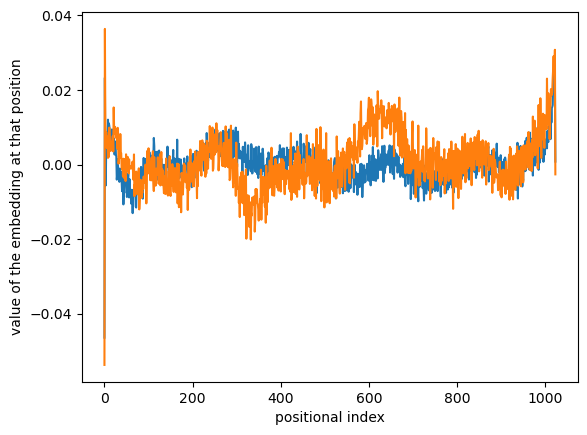

In [24]:
plt.plot(params["transformer.wpe.weight"][:, 150])  #plotting the 150th element in all the 
#position vectors, and we see that for all such elements, a sinusoidal pattern is followed
plt.plot(params["transformer.wpe.weight"][:, 200])
plt.xlabel("positional index")
plt.ylabel("value of the embedding at that position");

In [25]:
#analysing these weights for each of the layers is something which is done in 
#mehcanistic interpretability, and is used to understand how the model is working

In [27]:
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Once upon a time, ", max_length=20, num_return_sequences=5)

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time, \xa0it seemed that the great masses of our population had little interest in'},
 {'generated_text': 'Once upon a time, \xa0I heard of\xa0 a famous man who had died and asked,'},
 {'generated_text': "Once upon a time, \xa0that might just be my greatest wish. I'll try to add"},
 {'generated_text': 'Once upon a time, _____ made a small splash on the internet. He became famous for his'},
 {'generated_text': 'Once upon a time, \xa0she was young, and she had spent a lifetime living under her'}]